In [1]:
options(jupyter.plot_mimetypes = "image/svg+xml") 

t-tests
=======
One of the most common tests in statistics is the t-test, used to determine whether the means of two groups are equal to each other. The assumption for the test is that both groups are sampled from normal distributions with equal variances. The null hypothesis is that the two means are equal, and the alternative is that they are not. It is known that under the null hypothesis, we can calculate a t-statistic that will follow a t-distribution with n1 + n2 - 2 degrees of freedom. There is also a widely used modification of the t-test, known as Welch's t-test that adjusts the number of degrees of freedom when the variances are thought not to be equal to each other. Before we can explore the test much further, we need to find an easy way to calculate the t-statistic.

The function t.test is available in R for performing t-tests. Let's test it out on a simple example, using data simulated from a normal distribution.

In [2]:
x = rnorm(10)
y = rnorm(10)
t.test(x,y)


	Welch Two Sample t-test

data:  x and y
t = 1.0772, df = 13.646, p-value = 0.3001
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.3991013  1.2005696
sample estimates:
 mean of x  mean of y 
-0.1764193 -0.5771534 


Before we can use this function in a simulation, we need to find out how to extract the t-statistic (or some other quantity of interest) from the output of the t.test function. For this function, the R help page has a detailed list of what the object returned by the function contains. A general method for a situation like this is to use the class and names functions to find where the quantity of interest is. In addition, for some hypothesis tests, you may need to pass the object from the hypothesis test to the summary function and examine its contents. For t.test it's easy to figure out what we want:

In [3]:
ttest = t.test(x,y)
names(ttest)

[1] "statistic"   "parameter"   "p.value"     "conf.int"    "estimate"   
[6] "null.value"  "alternative" "method"      "data.name"

The value we want is named "statistic". To extract it, we can use the dollar sign notation, or double square brackets:

In [4]:
ttest$statistic
ttest[['statistic']]

t 
1.077204

t 
1.077204

Of course, just one value doesn't let us do very much - we need to generate many such statistics before we can look at their properties. In R, the replicate function makes this very simple. The first argument to replicate is the number of samples you want, and the second argument is an expression (not a function name or definition!) that will generate one of the samples you want. To generate 1000 t-statistics from testing two groups of 10 standard random normal numbers, we can use:

In [5]:
ts = replicate(1000,t.test(rnorm(10),rnorm(10))$statistic)

Under the assumptions of normality and equal variance, we're assuming that the statistic will have a t-distribution with 10 + 10 - 2 = 18 degrees of freedom. (Each observation contributes a degree of freedom, but we lose two because we have to estimate the mean of each group.) How can we test if that is true?

One way is to plot the theoretical density of the t-statistic we should be seeing, and superimposing the density of our sample on top of it. To get an idea of what range of x values we should use for the theoretical density, we can view the range of our simulated data:

In [6]:
range(ts)
range(ts)

[1] -4.671335  3.996483

[1] -4.671335  3.996483

Since the distribution is supposed to be symmetric, we'll use a range from -4.5 to 4.5. We can generate equally spaced x-values in this range with seq:

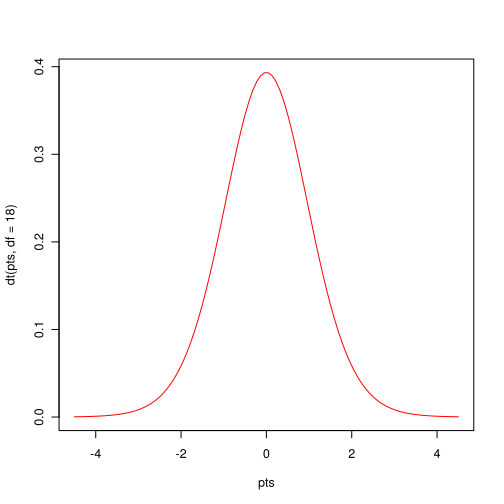

In [7]:
pts = seq(-4.5,4.5,length=100)
plot(pts,dt(pts,df=18),col='red',type='l')

Now we can add a line to the plot showing the density for our simulated sample:

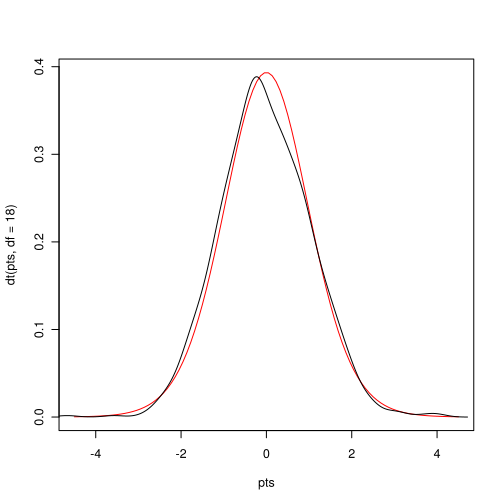

In [8]:
plot(pts,dt(pts,df=18),col='red',type='l')
lines(density(ts))

Another way to compare two densities is with a quantile-quantile plot. In this type of plot, the quantiles of two samples are calculated at a variety of points in the range of 0 to 1, and then are plotted against each other. If the two samples came from the same distribution with the same parameters, we'd see a straight line through the origin with a slope of 1; in other words, we're testing to see if various quantiles of the data are identical in the two samples. If the two samples came from similar distributions, but their parameters were different, we'd still see a straight line, but not through the origin. For this reason, it's very common to draw a straight line through the origin with a slope of 1 on plots like this. We can produce a quantile-quantile plot (or QQ plot as they are commonly known), using the qqplot function. To use qqplot, pass it two vectors that contain the samples that you want to compare. When comparing to a theoretical distribution, you can pass a random sample from that distribution. Here's a QQ plot for the simulated t-test data:

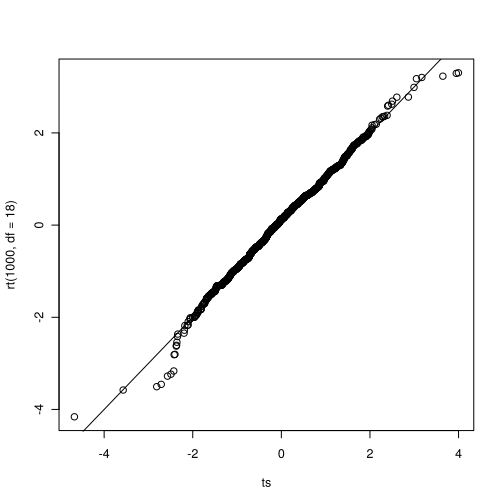

In [9]:
qqplot(ts,rt(1000,df=18))
abline(0,1)

We can see that the central points of the graph seems to agree fairly well, but there are some discrepancies near the tails (the extreme values on either end of the distribution). The tails of a distribution are the most difficult part to accurately measure, which is unfortunate, since those are often the values that interest us most, that is, the ones which will provide us with enough evidence to reject a null hypothesis. Because the tails of a distribution are so important, another way to test to see if a distribution of a sample follows some hypothesized distribution is to calculate the quantiles of some tail probabilities (using the quantile function) and compare them to the theoretical probabilities from the distribution (obtained from the function for that distribution whose first letter is "q"). Here's such a comparison for our simulated data:

In [10]:
probs = c(.9,.95,.99)
quantile(ts,probs)
qt(probs,df=18)

90%      95%      99% 
1.347552 1.712284 2.418109

[1] 1.330391 1.734064 2.552380

The quantiles agree fairly well, especially at the .95 and .99 quantiles. Performing more simulations, or using a large sample size for the two groups would probably result in values even closer to what we have theoretically predicted.

One final method for comparing distributions is worth mentioning. We noted previously that one of the assumptions for the t-test is that the variances of the two samples are equal. However, a modification of the t-test known as Welch's test is said to correct for this problem by estimating the variances, and adjusting the degrees of freedom to use in the test. This correction is performed by default, but can be shut off by using the var.equal=TRUE argument. Let's see how it works:

In [11]:
t.test(x,y)
t.test(x,y,var.equal=TRUE)


	Welch Two Sample t-test

data:  x and y
t = 1.0772, df = 13.646, p-value = 0.3001
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.3991013  1.2005696
sample estimates:
 mean of x  mean of y 
-0.1764193 -0.5771534 



	Two Sample t-test

data:  x and y
t = 1.0772, df = 18, p-value = 0.2956
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.3808367  1.1823051
sample estimates:
 mean of x  mean of y 
-0.1764193 -0.5771534 


Since the statistic is the same in both cases, it doesn't matter whether we use the correction or not; either way we'll see identical results when we compare the two methods using the techniques we've already described. Since the degree of freedom correction changes depending on the data, we can't simply perform the simulation and compare it to a different number of degrees of freedom. The other thing that changes when we apply the correction is the p-value that we would use to decide if there's enough evidence to reject the null hypothesis. What is the behaviour of the p-values? While not necessarily immediately obvious, under the null hypothesis, the p-values for any statistical test should form a uniform distribution between 0 and 1; that is, any value in the interval 0 to 1 is just as likely to occur as any other value. For a uniform distribution, the quantile function is just the identity function. A value of .5 is greater than 50% of the data; a value of .95 is greater than 95% of the data. As a quick check of this notion, let's look at the density of probability values when the null hypothesis is true:

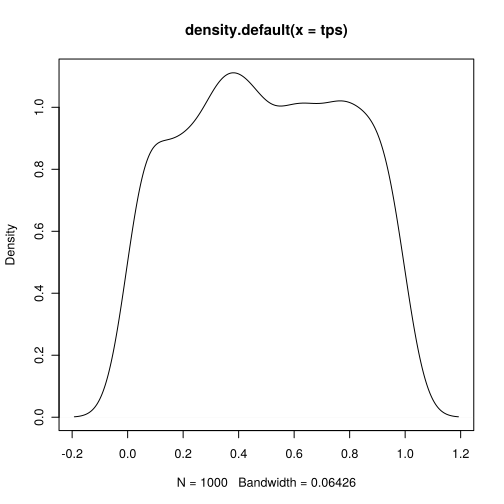

In [12]:
tps = replicate(1000,t.test(rnorm(10),rnorm(10))$p.value)
plot(density(tps))

Another way to check to see if the probabilities follow a uniform distribution is with a QQ plot:

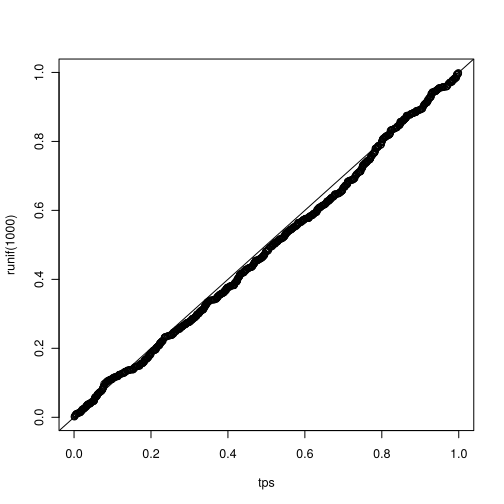

In [13]:
qqplot(tps,runif(1000))
abline(0,1)

The idea that the probabilities follow a uniform distribution seems reasonable.

Now, let's look at some of the quantiles of the p-values when we force the t.test function to use var.equal=TRUE:

In [14]:
tps = replicate(1000,t.test(rnorm(10),rnorm(10),var.equal=TRUE)$p.value)
probs = c(.5,.7,.9,.95,.99)
quantile(tps,probs)

50%       70%       90%       95%       99% 
0.4865125 0.6870746 0.8843709 0.9416887 0.9856920

The agreement actually looks very good. What about when we let t.test decide whether to make the correction or not?

In [15]:
tps = replicate(1000,t.test(rnorm(10),rnorm(10))$p.value)
quantile(tps,probs)

50%       70%       90%       95%       99% 
0.4952452 0.7044233 0.8975897 0.9458744 0.9886818

There's not that much of a difference, but, of course, the variances in this example were equal. How does the correction work when the variances are not equal?

In [16]:
tps = replicate(1000,t.test(rnorm(10),rnorm(10,sd=5),var.equal=TRUE)$p.value)
quantile(tps,probs)
tps = replicate(1000,t.test(rnorm(10),rnorm(10,sd=5))$p.value)
quantile(tps,probs)

50%       70%       90%       95%       99% 
0.5019727 0.7007356 0.8938573 0.9489785 0.9892927

50%       70%       90%       95%       99% 
0.5143567 0.6969263 0.9016618 0.9463651 0.9876568

There is an improvement, but not so dramatic.

Power of the t-test
-------------------
Of course, all of this is concerned with the null hypothesis. Now let's start to investigate the power of the t-test. With a sample size of 10, we obviously aren't going to expect truly great performance, so let's consider a case that's not too subtle. When we don't specify a standard deviation for rnorm it uses a standard deviation of 1. That means about 68% of the data will fall in the range of -1 to 1. Suppose we have a difference in means equal to just one standard deviation, and we want to calculate the power for detecting that difference. We can follow the same procedure as the coin tossing experiment: specify an alpha level, calculate the rejection region, simulate data under the alternative hypothesis, and see how many times we'd reject the null hypothesis. As in the coin toss example, a function will make things much easier:

In [17]:
t.power = function(nsamp=c(10,10),nsim=1000,means=c(0,0),sds=c(1,1)){
    lower = qt(.025,df=sum(nsamp) - 2)
    upper = qt(.975,df=sum(nsamp) - 2)
    ts = replicate(nsim,
       t.test(rnorm(nsamp[1],mean=means[1],sd=sds[1]),
              rnorm(nsamp[2],mean=means[2],sd=sds[2]))$statistic)

    sum(ts < lower | ts > upper) / nsim
}

Let's try it with our simple example:

In [18]:
t.power(means=c(0,1))

[1] 0.54

Not bad for a sample size of 10!

Of course, if the differences in means are smaller, it's going to be harder to reject the null hypothesis:

In [19]:
t.power(means=c(0,.3))

[1] 0.089

How large a sample size would we need to detect that difference of .3 with 95% power?

In [20]:
samps = c(100,200,300,400,500)
res = sapply(samps,function(n)t.power(means=c(0,.3),nsamp=c(n,n)))
names(res) = samps
res

100   200   300   400   500 
0.527 0.851 0.953 0.987 0.999

It would take over 300 samples in each group to be able to detect such a difference.

Now we can return to the issue of unequal variances. We saw that Welch's adjustment to the degrees of freedom helped a little bit under the null hypothesis. Now let's see if the power of the test is improved using Welch's test when the variances are unequal. To do this, we'll need to modify our t.power function a little:

In [21]:
t.power1 = function(nsamp=c(10,10),nsim=1000,means=c(0,0),sds=c(1,1),var.equal=TRUE){
   tps = replicate(nsim,
       t.test(rnorm(nsamp[1],mean=means[1],sd=sds[1]),
              rnorm(nsamp[2],mean=means[2],sd=sds[2]))$p.value)

    sum(tps < .025 | tps > .975) / nsim
}

Since I set var.equal=TRUE by default, Welch's adjustment will not be used unless we specify var.equal=FALSE. Let's see what the power is for a sample of size 10, assuming the mean of one of the groups is 1, and its standard deviation is 2, while the other group is left at the default of mean=0 and sd=1:

In [22]:
t.power1(nsim=10000,sds=c(1,2),mean=c(1,2))
t.power1(nsim=10000,sds=c(1,2),mean=c(1,2),var.equal=FALSE)

[1] 0.1805

[1] 0.1818

There does seem to be an improvement, but not so dramatic.

We can look at the same thing for a variety of sample sizes:

In [ ]:
res1 = sapply(sizes, function(n)t.power1(nsim=10000,sds=c(1,2), mean=c(1,2), nsamp=c(n,n)))
names(res1) = sizes
res1
res2 = sapply(sizes, function(n)t.power1(nsim=10000,sds=c(1,2), mean=c(1,2), nsamp=c(n,n), var.equal=FALSE))
names(res2) = sizes
res2